# Préparation de l'environnement et du fichier

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Lecture du fichier
df=pd.read_csv("eco2mix_clean.csv",low_memory=False)
#paramétrer les nombres à virgule flottante pour qu'ils ne s'affichent pas en puissances
np.set_printoptions(suppress=True)

In [ ]:
# Configurer l'affichage des nombres à virgule flottante
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Configurer pandas pour afficher toutes les colonnes
pd.set_option('display.max_columns', None)

In [ ]:
# passage des colonnes temporelles en type date time
df['Date']=pd.to_datetime(df['Date'])
#df['Hour'] = pd.to_datetime(df['Hour'], format = '%H:%M:%S').dt.time
#convertir la colonne code INSEE en string
df['Code INSEE région'] = df['Code INSEE région'].astype('str')

In [ ]:
df

,Code INSEE région,Région,Date,Hour,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW),TCO Thermique (%),TCH Thermique (%),TCO Nucléaire (%),TCH Nucléaire (%),TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%),JourSemaine,PROD,CONSO,Année_mois,Année,Mois
0,11,Île-de-France,2013-01-01,00:00:00,9134.00,685.00,8824.67,16.00,0.00,0.00,0.00,142.00,8289.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,9667.67,9134.00,2013-01,2013,1
1,11,Île-de-France,2013-01-01,01:00:00,17321.00,1370.00,15572.17,31.00,0.00,0.00,-273.17,288.00,15629.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2,17261.17,17047.83,2013-01,2013,1
2,11,Île-de-France,2013-01-01,02:00:00,16379.00,1362.00,16666.17,31.00,0.00,0.00,-813.00,299.00,14681.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2,18358.17,15566.00,2013-01,2013,1
3,11,Île-de-France,2013-01-01,03:00:00,15515.00,1358.00,17603.00,32.00,0.00,0.00,-2696.00,294.00,13828.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2,19287.00,12819.00,2013-01,2013,1
4,11,Île-de-France,2013-01-01,04:00:00,14818.00,1366.00,12520.00,30.00,0.00,0.00,-1014.17,289.00,13130.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2,14205.00,13803.83,2013-01,2013,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1060699,93,Provence-Alpes-Côte d'Azur,2023-01-31,19:00:00,13102.00,561.00,0.00,61.00,0.00,4233.00,0.00,167.00,8082.00,8.56,20.65,0.00,148.86,0.93,63.54,0.00,0.00,64.62,129.69,2.55,56.23,2,5022.00,13102.00,2023-01,2023,1
1060700,93,Provence-Alpes-Côte d'Azur,2023-01-31,20:00:00,12779.00,562.00,0.00,71.00,0.00,4076.00,0.00,169.00,7900.00,8.80,20.68,0.00,146.62,1.11,73.96,0.00,0.00,63.79,124.88,2.65,56.90,2,4878.00,12779.00,2023-01,2023,1
1060701,93,Provence-Alpes-Côte d'Azur,2023-01-31,21:00:00,12153.00,561.00,0.00,67.00,0.00,3871.00,0.00,165.00,7490.00,9.23,20.65,0.00,117.92,1.11,69.79,0.00,0.00,63.70,118.59,2.72,55.56,2,4664.00,12153.00,2023-01,2023,1
1060702,93,Provence-Alpes-Côte d'Azur,2023-01-31,22:00:00,11705.00,566.00,0.00,68.00,0.00,3666.00,0.00,169.00,7238.00,9.67,20.83,0.00,134.58,1.16,70.83,0.00,0.00,62.64,112.31,2.89,56.90,2,4469.00,11705.00,2023-01,2023,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1060704 entries, 0 to 1060703
Data columns (total 31 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   Code INSEE région    1060704 non-null  object        
 1   Région               1060704 non-null  object        
 2   Date                 1060704 non-null  datetime64[ns]
 3   Hour                 1060704 non-null  object        
 4   Consommation (MW)    1060704 non-null  float64       
 5   Thermique (MW)       1060704 non-null  float64       
 6   Nucléaire (MW)       1060704 non-null  float64       
 7   Eolien (MW)          1060704 non-null  float64       
 8   Solaire (MW)         1060704 non-null  float64       
 9   Hydraulique (MW)     1060704 non-null  float64       
 10  Pompage (MW)         1060704 non-null  float64       
 11  Bioénergies (MW)     1060704 non-null  float64       
 12  Ech. physiques (MW)  1060704 non-null  float64       
 1

In [ ]:
#répartir les colonnes en 3 groupes pour les variables numériques, catégorielles et temporelles
col_num = df[['Consommation (MW)', 'Nucléaire (MW)', 'Thermique (MW)', 'Eolien (MW)',
            'Solaire (MW)', 'Hydraulique (MW)', 'Bioénergies (MW)', 'Pompage (MW)', 'Ech. physiques (MW)',
            'TCO Nucléaire (%)', 'TCH Nucléaire (%)',
            'TCH Thermique (%)', 'TCO Thermique (%)',
            'TCO Eolien (%)', 'TCH Eolien (%)',
            'TCO Hydraulique (%)', 'TCH Hydraulique (%)',
            'TCO Solaire (%)', 'TCH Solaire (%)',
            'TCO Bioénergies (%)', 'TCH Bioénergies (%)',
            'PROD', 'CONSO']]
col_cat = df[['Code INSEE région','Région']]
col_temp = df[['Date', 'Hour', 'JourSemaine']]

#groupe des colonnes TCH et TCO
col_TCH = df[['TCH Nucléaire (%)','TCH Thermique (%)', 'TCH Eolien (%)', 'TCH Hydraulique (%)','TCH Solaire (%)', 'TCH Bioénergies (%)']]
col_TC0 = df[['TCO Nucléaire (%)','TCO Thermique (%)', 'TCO Eolien (%)', 'TCO Hydraulique (%)','TCO Solaire (%)', 'TCO Bioénergies (%)']]
# groupe des colonnes en MW
col_MW = df[['Consommation (MW)', 'Nucléaire (MW)', 'Thermique (MW)', 'Eolien (MW)',
            'Solaire (MW)', 'Hydraulique (MW)', 'Bioénergies (MW)', 'Pompage (MW)', 'Ech. physiques (MW)']]
#groupe des colonnes de production d'énergie
col_production = df[['Nucléaire (MW)', 'Thermique (MW)', 'Eolien (MW)',
            'Solaire (MW)', 'Hydraulique (MW)', 'Bioénergies (MW)']]

# Analyse des variables numériques

In [ ]:
#statistiques descriptives de toutes les variables numériques
col_num.describe().T

,count,mean,std,min,25%,50%,75%,max
Consommation (MW),1060704.00,8946.81,4321.85,1413.00,5536.00,8206.00,11418.00,30488.00
Nucléaire (MW),1060704.00,11296.32,6166.56,0.00,7104.00,11493.00,15582.00,27250.00
Thermique (MW),1060704.00,764.11,1079.77,0.00,50.00,323.00,1002.00,8578.00
Eolien (MW),1060704.00,531.40,901.15,0.00,58.00,218.00,619.00,9929.00
Solaire (MW),1060704.00,193.92,475.73,0.00,0.00,2.00,140.00,5754.00
Hydraulique (MW),1060704.00,1178.94,2024.86,0.00,10.00,112.00,1723.00,16557.00
Bioénergies (MW),1060704.00,169.90,90.43,8.00,98.00,154.00,234.00,2443.00
Pompage (MW),1060704.00,-215.62,527.74,-5156.00,-99.00,-2.00,0.00,0.00
Ech. physiques (MW),1060704.00,-878.01,8592.03,-24649.00,-8089.00,1157.00,4426.00,27852.00
TCO Nucléaire (%),1060704.00,62.76,154.90,0.00,0.00,0.00,0.00,1569.79


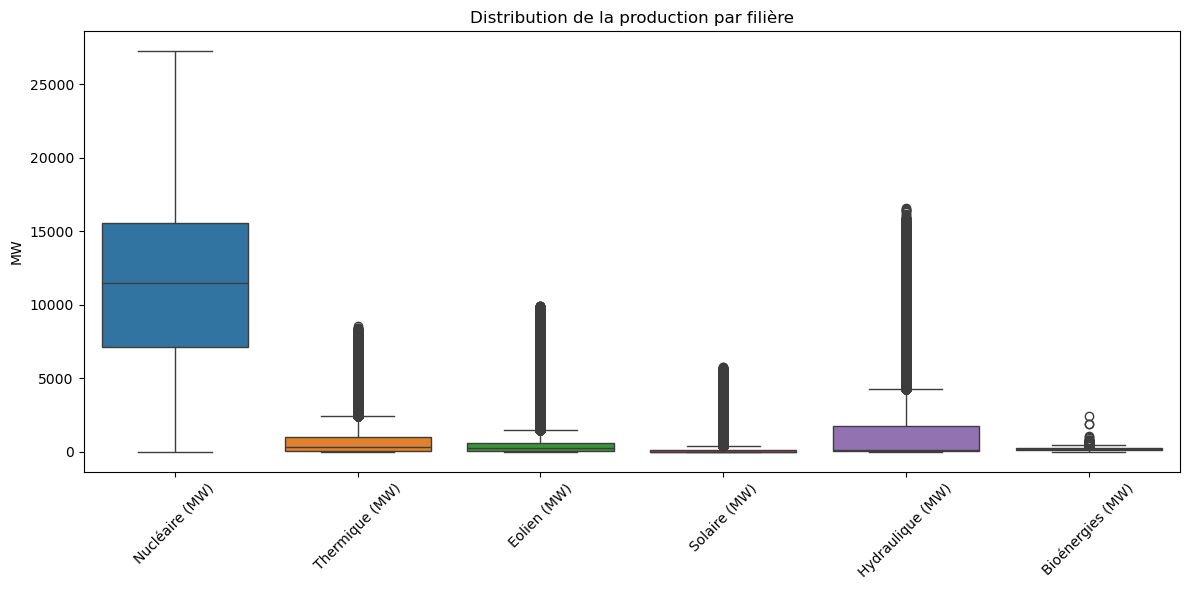

In [ ]:
#Box plot des productions par filières
plt.figure(figsize=(12, 6))
sns.boxplot(data=col_production)
plt.title('Distribution de la production par filière')
plt.ylabel('MW')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

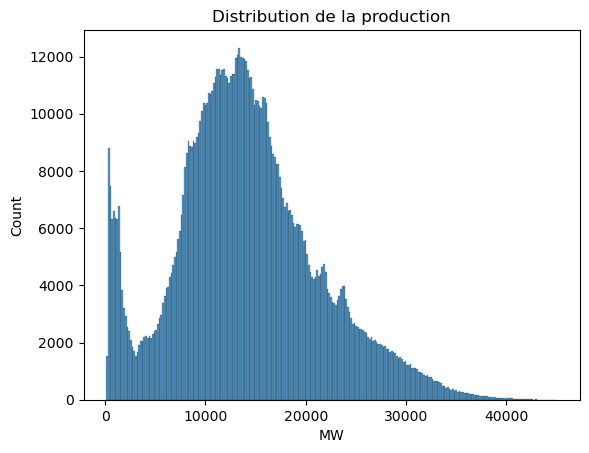

In [ ]:
#distribution de la production
plt.title('Distribution de la production')
plt.xlabel('MW')
sns.histplot(df.PROD);

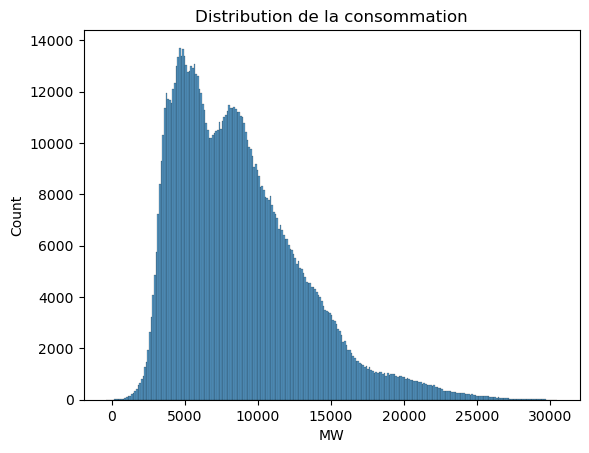

In [ ]:
#distribution de la consommation
plt.title('Distribution de la consommation')
plt.xlabel('MW')
sns.histplot(df.CONSO);

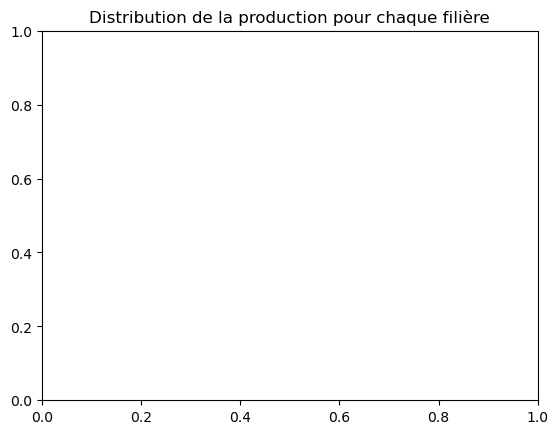

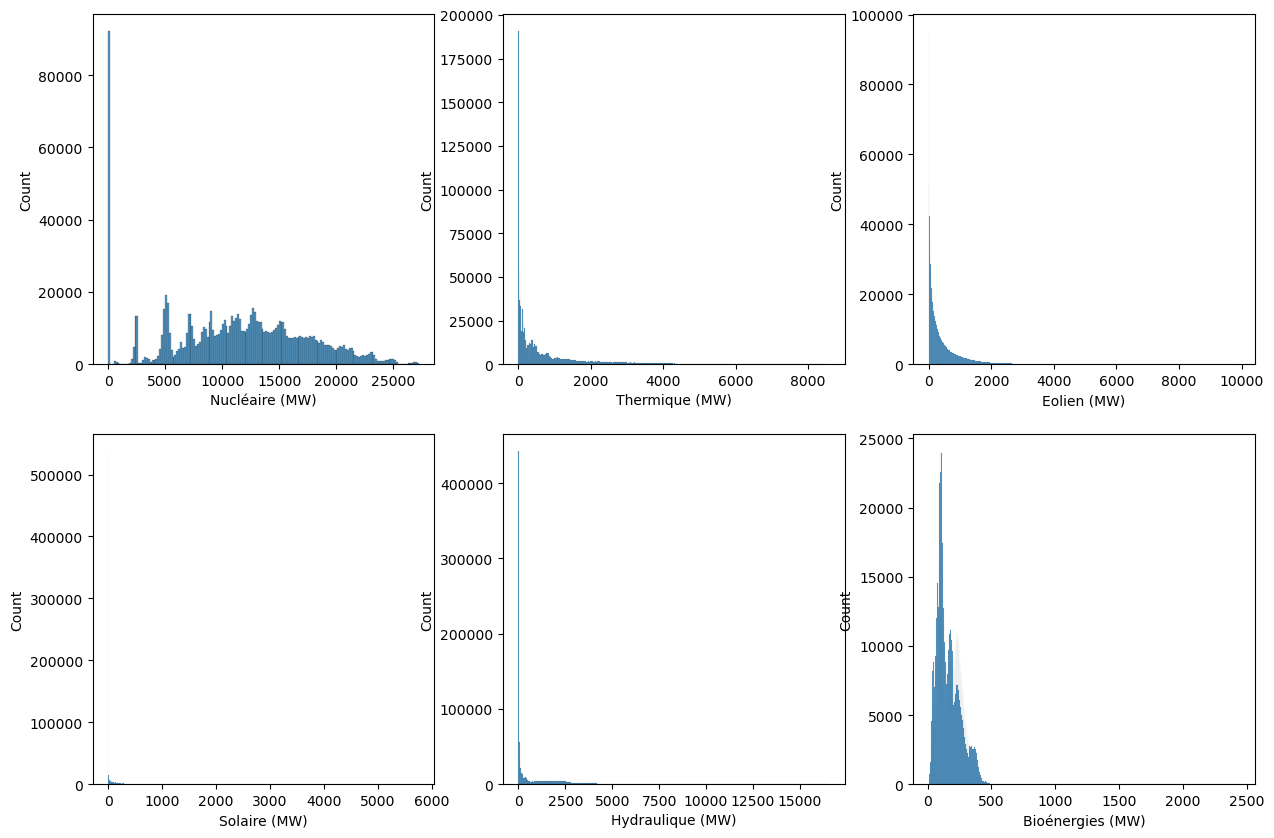

In [ ]:
#distribution des colonnes de production d'énergie par filières
plt.title('Distribution de la production pour chaque filière')
plt.figure( figsize= (15,10) )
for i,j in enumerate(col_production):
    plt.subplot(2,3,i+1)
    sns.histplot(df[j])


# Analyse des variables catégorielles

In [ ]:
# liste des valeurs et mode
for col in col_cat:
    if df[col].dtype == 'object':
        print('variable :',col)
        print('valeurs :',df[col].unique())
        print('mode :')
        display(df[col].mode())
        print('...')

#le mode nous permet de voir qu'aucune valeur n'apparait plus que les autres dans les colonnes code insee region et region

variable : Code INSEE région
valeurs : ['11' '24' '27' '28' '32' '44' '52' '53' '75' '76' '84' '93']
mode :


0     11
1     24
2     27
3     28
4     32
5     44
6     52
7     53
8     75
9     76
10    84
11    93
Name: Code INSEE région, dtype: object

...
variable : Région
valeurs : ['Île-de-France' 'Centre-Val de Loire' 'Bourgogne-Franche-Comté'
 'Normandie' 'Hauts-de-France' 'Grand Est' 'Pays de la Loire' 'Bretagne'
 'Nouvelle-Aquitaine' 'Occitanie' 'Auvergne-Rhône-Alpes'
 "Provence-Alpes-Côte d'Azur"]
mode :


0           Auvergne-Rhône-Alpes
1        Bourgogne-Franche-Comté
2                       Bretagne
3            Centre-Val de Loire
4                      Grand Est
5                Hauts-de-France
6                      Normandie
7             Nouvelle-Aquitaine
8                      Occitanie
9               Pays de la Loire
10    Provence-Alpes-Côte d'Azur
11                 Île-de-France
Name: Région, dtype: object

...


# Analyse mutivariée

<Axes: title={'center': 'Matrice de corrélation entre les valeurs numériques'}>

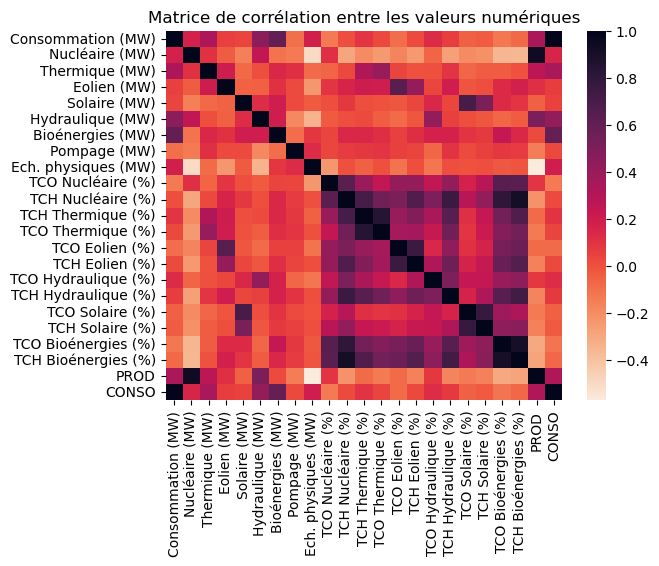

In [ ]:
#matrice de corrélation entre les valeurs numériques
plt.title('Matrice de corrélation entre les valeurs numériques')
sns.heatmap(col_num.corr(), cmap="rocket_r")

# on voit des corrélations fortes entre
# - la production totale et la production nucléaire
# - le TCO eolien et la production éolienne
# - le TCO nucléaire et la production nucléaire
# - la consommation et la production de bioénergies
# - entre les paires TCO - TCH de la plupart des filières

## Analyse par région

<Figure size 1200x1200 with 0 Axes>

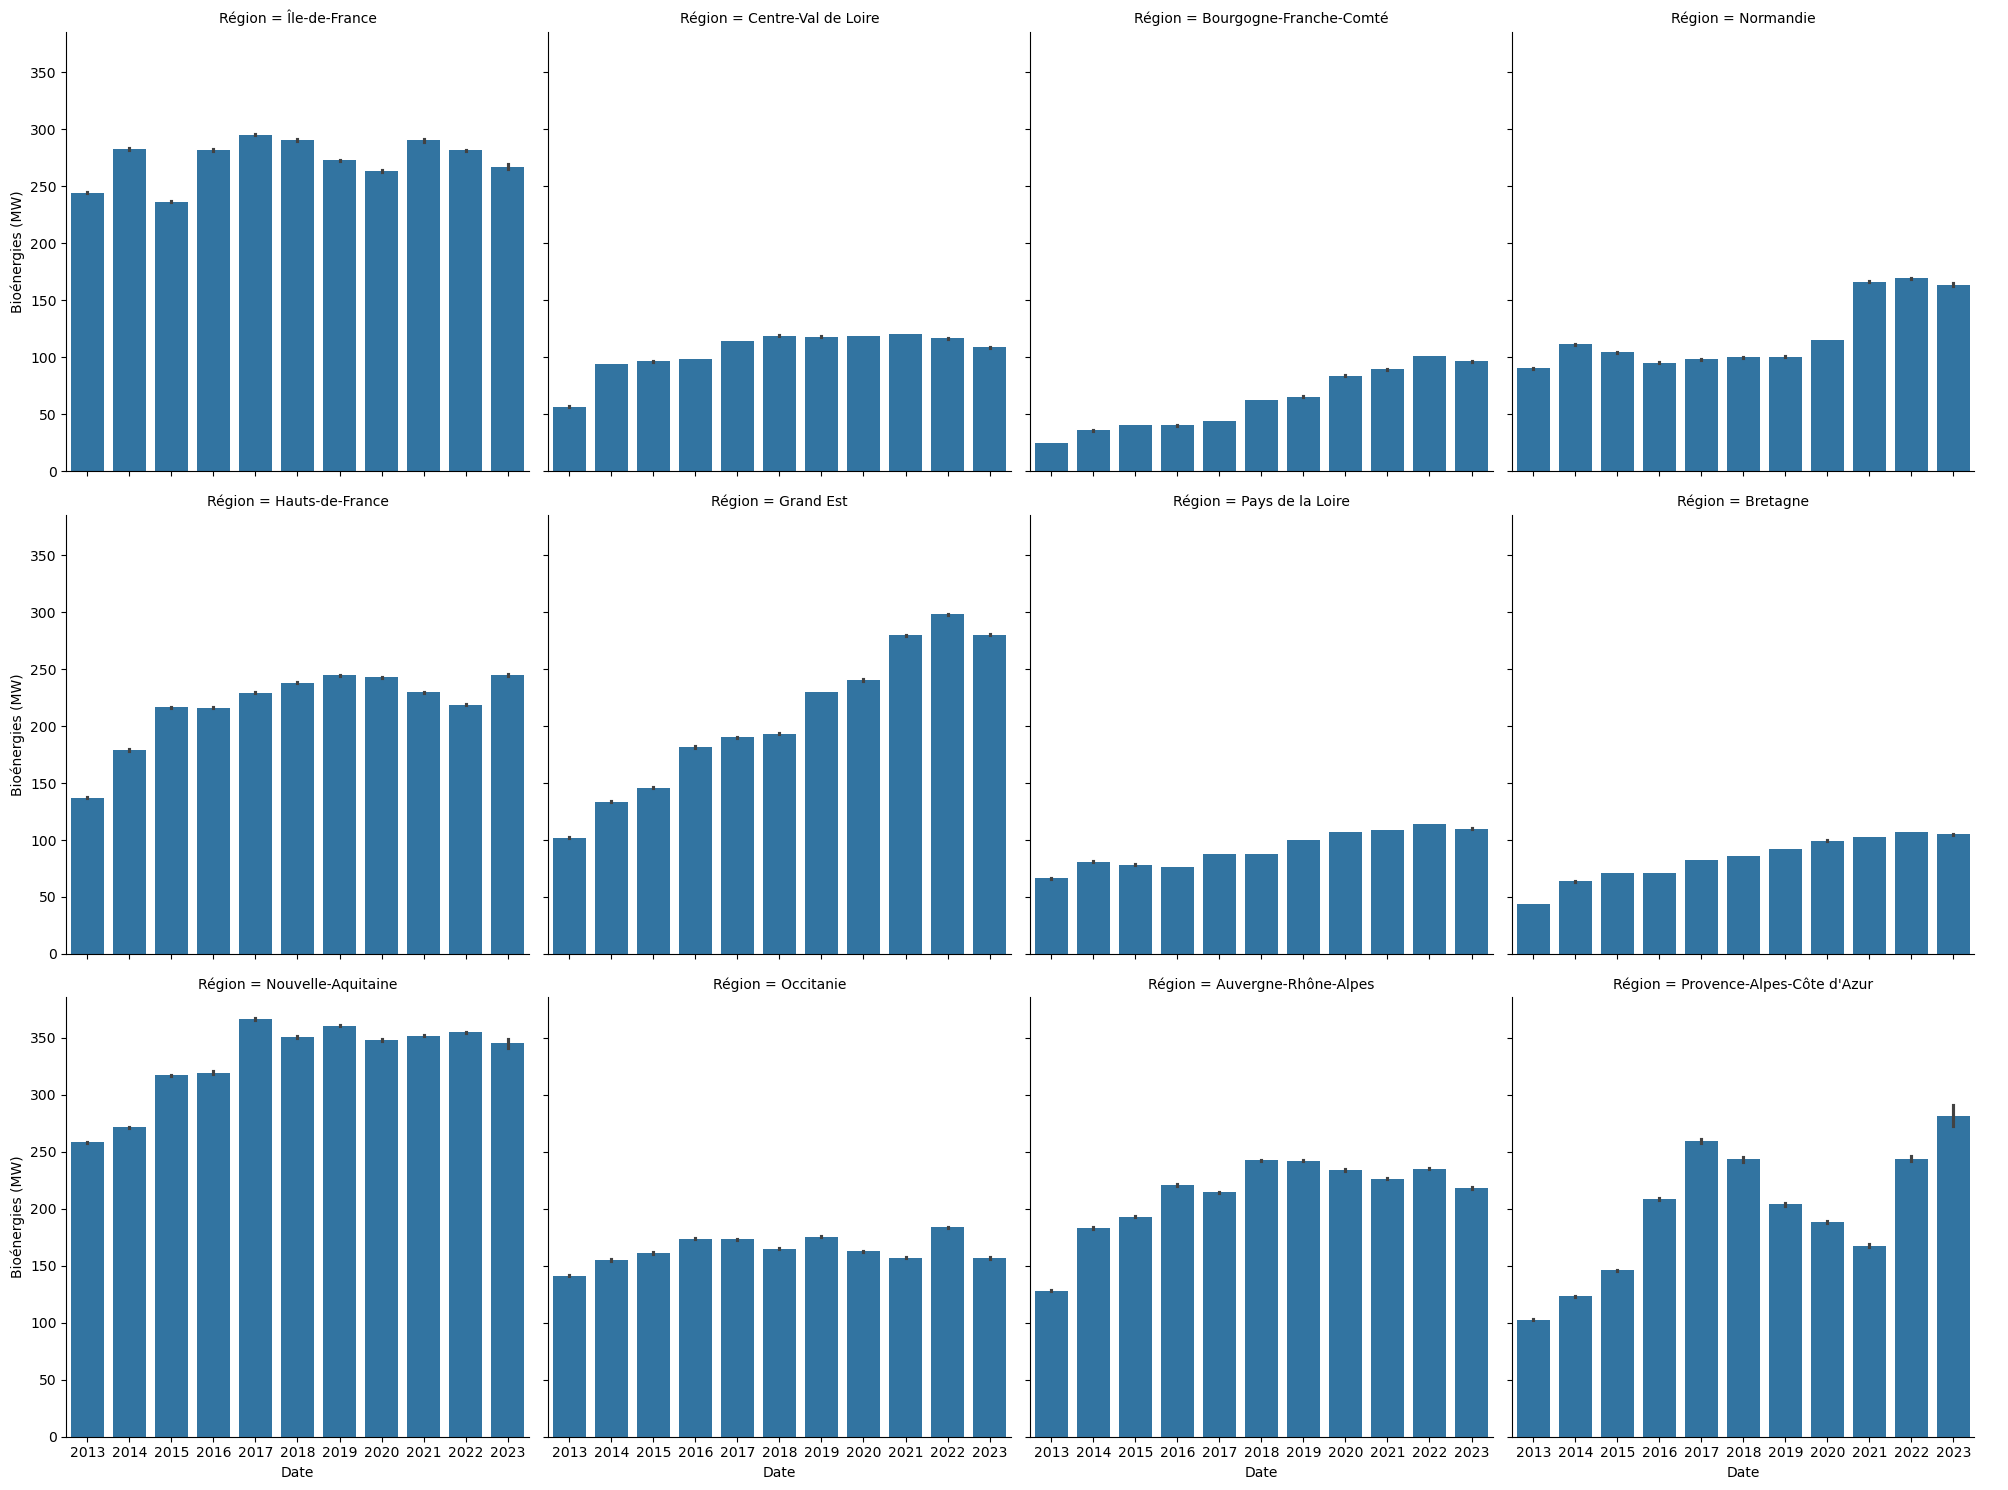

In [ ]:
plt.figure(figsize=(12, 12))
sns.catplot(x=df.Date.dt.year, y='Bioénergies (MW)',data=df, kind='bar',col='Région',col_wrap=4)
plt.show()

Text(46.87831018518516, 0.5, 'Consommation (MW)')

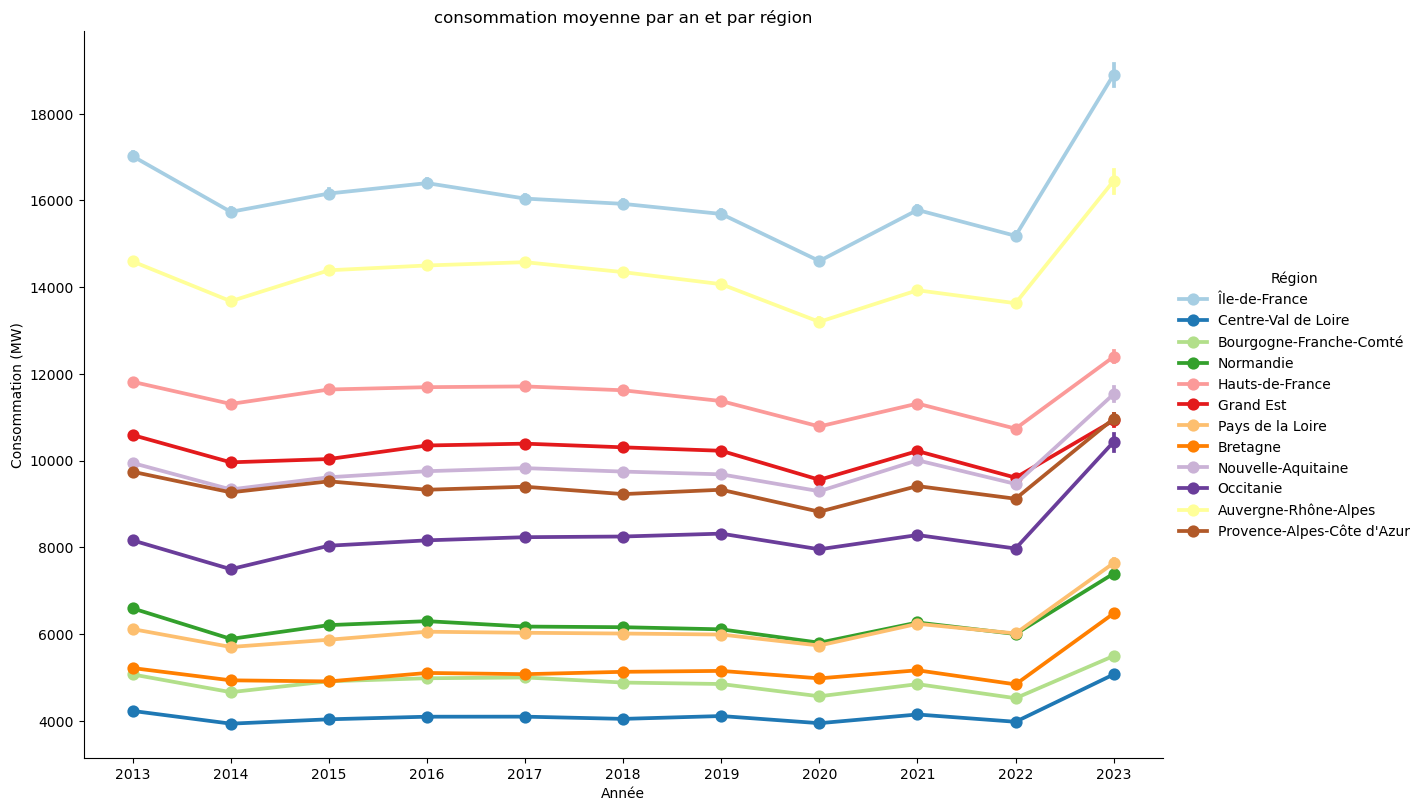

In [ ]:
#consommation moyenne par an et par région
sns.catplot(x=df.Année, y='CONSO',data=df, kind='point', hue='Région',
            height=8, aspect=1.5, palette="Paired")
plt.title('consommation moyenne par an et par région')
plt.ylabel('Consommation (MW)')
# attention l'année 2023 n'est pas complète
# c'est la region IDF qui consomme le plus, suivi de auvergne-rhone-alpes
# => cela peut s'expliquer par fait qu'elles sont les + peuplées en FR
# et haut de france
# => notamment lié au fait qu'elle abrite des industries lourdes énergivores et sa densité de population

Text(46.87831018518516, 0.5, 'Production (MW)')

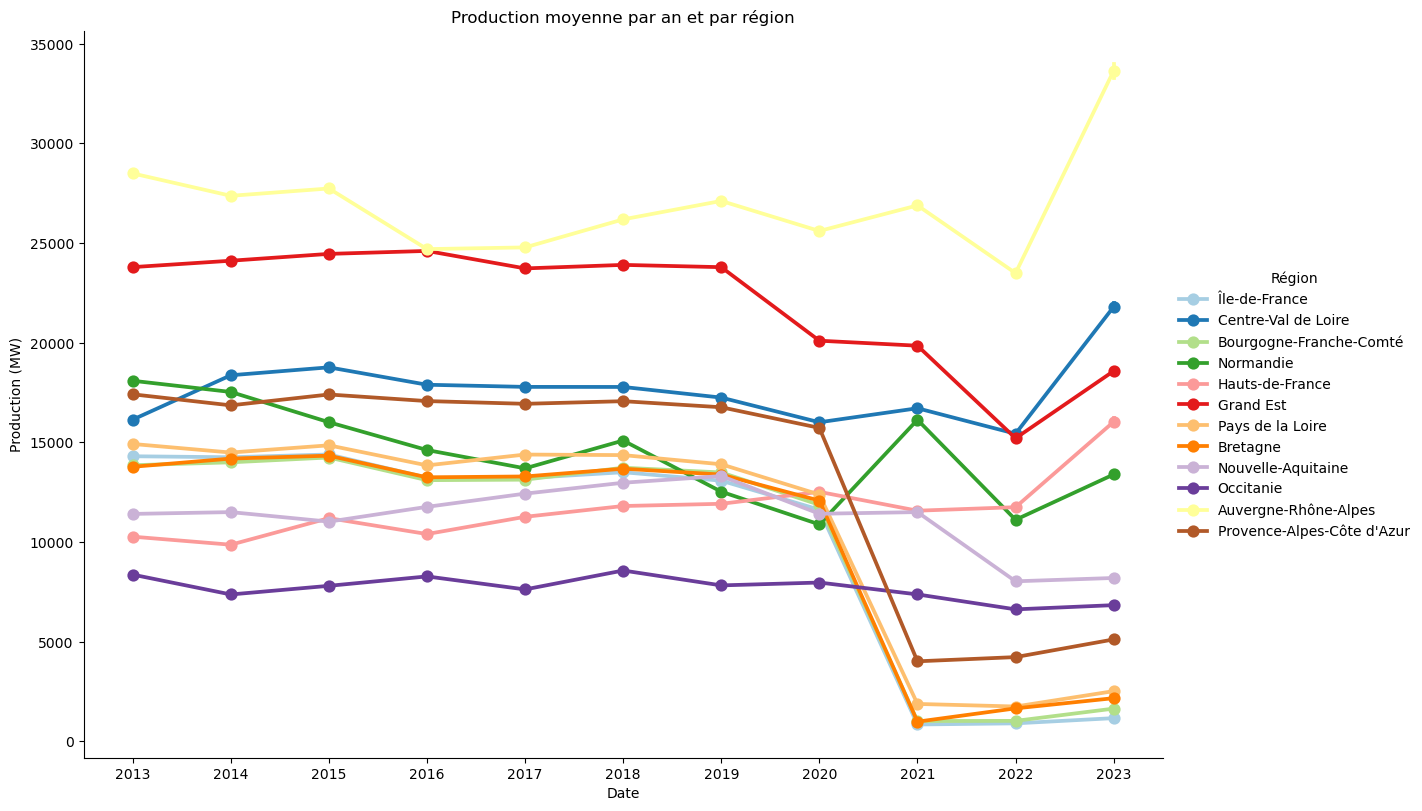

In [ ]:
#production moyenne par an et par région
sns.catplot(x=df.Date.dt.year, y='PROD',data=df, kind='point', hue='Région',
            height=8, aspect=1.5, palette="Paired")
plt.title('Production moyenne par an et par région')
plt.ylabel('Production (MW)')

# la production chute massivement en 2021 ce qui est bizarre

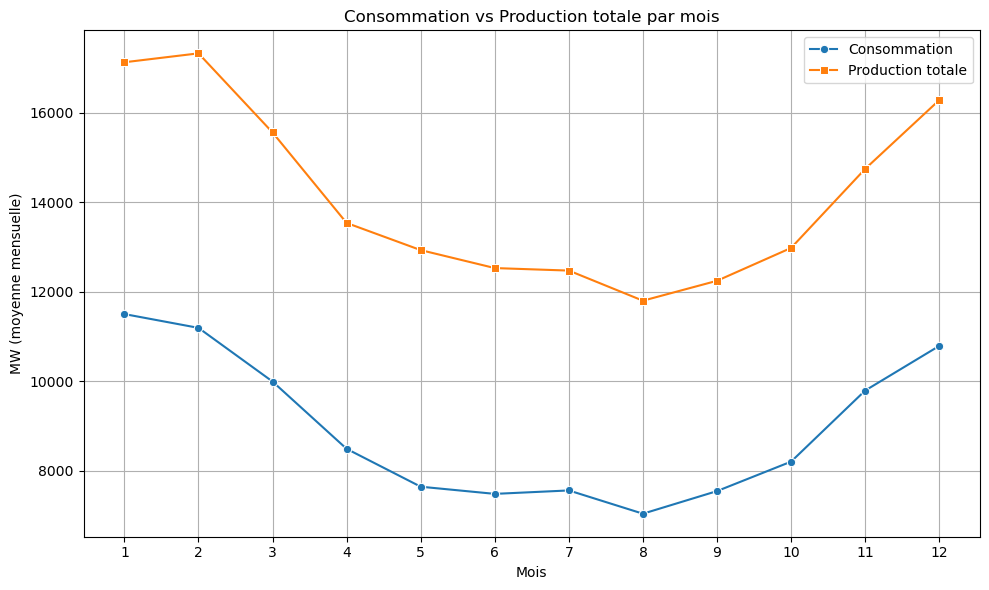

In [ ]:
# Consommation vs Production totale par mois
# Calcul de la moyenne par mois
df_mois = df.groupby('Mois')[['Consommation (MW)', 'PROD']].mean().reset_index()

# Tracer le graphique
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_mois, x='Mois', y='Consommation (MW)', marker='o', label='Consommation')
sns.lineplot(data=df_mois, x='Mois', y='PROD', marker='s', label='Production totale')

plt.title("Consommation vs Production totale par mois")
plt.xlabel("Mois")
plt.ylabel("MW (moyenne mensuelle)")
plt.xticks(range(1, 13))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# comme on peut s'y attendre la consommation est au plus haut pendant les mois d'hiver, et baisse en été